In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import panel as pn
import glob
import scipy as sp
from scipy import stats

In [2]:
tempnames = glob.glob('*infoshift*weight*.txt')

In [3]:
tempnames

['pcmheatdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'ybdGAnaerodataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'znuAheatdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'mutMdataset_5759_RNA41_with_tagv3_0_160MCMC194_infoshift_no_weightv2_smoothed.txt',
 'hslUSSdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'yedJxanth2dataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'iapFedataset_alldone_with_largeMCMC195_infoshift_no_weightv2_smoothed.txt',
 'ycbZM9dataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'fdhEarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ycbZAnaerodataset_alldone_with_largeMCMC195_infoshift_no_weightv2_smoothed.txt',
 'yehSarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'xylFarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ygeRmetaldatas

In [4]:
allnames = glob.glob('*infoshift*smooth*.txt')
#allnames = allnames + glob.glob('*M9*weight*smooth*.txt')
#allnames = glob.glob('*M9*weight*smooth*.txt')

In [5]:
features_df = pd.io.parsers.read_csv('/home/bill/next100genes/all_features_with_locations.csv')

In [6]:
all_inversion = ['ygjP','iap','tar','yjjJ','tff-rpsB-tsf','dicC','ybiP','tig','ilvC','ybiO','zapB','yqhC'
                 ,'zupT','yedK','dinJ','yehT','ygeR','coaA','znuCB','xylA','modE','ygdH','dpiBA'
                 ,'dicA','ybeZ','ymgG','ecnB','asnA','maoP','thiM','yecE','thrLABC','rlmA','sdaB'
                ]

In [7]:
allnames

['pcmheatdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'ybdGAnaerodataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'znuAheatdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'mutMdataset_5759_RNA41_with_tagv3_0_160MCMC194_infoshift_no_weightv2_smoothed.txt',
 'hslUSSdataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'yedJxanth2dataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'iapFedataset_alldone_with_largeMCMC195_infoshift_no_weightv2_smoothed.txt',
 'ycbZM9dataset_alldone_with_largeMCMC194_infoshift_no_weightv2_smoothed.txt',
 'fdhEarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ycbZAnaerodataset_alldone_with_largeMCMC195_infoshift_no_weightv2_smoothed.txt',
 'yehSarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'xylFarabinosedataset_alldone_with_largeMCMC194_infoshift_no_weight_smoothed.txt',
 'ygeRmetaldatas

In [8]:
def filter_all(s):
    if s > 0:
        return s
    else:
        return -s
    
def filter_pos(s):
    if s > 0:
        return s
    else:
        return 0

def filter_neg(s):
    if s < 0:
        return -s
    else:
        return 0
    

In [9]:
def sliding_window(y,windowsize=3):
    out_vec = np.zeros_like(y)
    for i in range(len(y)-windowsize):
        out_vec[i] = np.sum(y[i:i+windowsize])/windowsize
    return out_vec

In [10]:
def choose_dict(dicttype,modeltype='MAT'):
    
    if dicttype == 'dna':
        seq_dict = {'A':0,'C':1,'G':2,'T':3}
        inv_dict = {0:'A',1:'C',2:'G',3:'T'}
    elif dicttype == 'rna':
        seq_dict = {'A':0,'C':1,'G':2,'U':3}
        inv_dict = {0:'A',1:'C',2:'G',3:'U'}
    elif dicttype == 'protein':
        seq_dict = {
            '*':0,'A':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'K':9,'L':10,
            'M':11,'N':12,'P':13,'Q':14,'R':15,'S':16,'T':17,'V':18,'W':19,'Y':20}
        inv_dict = {v:k for k,v in seq_dict.items()}
    else:
        raise SortSeqError('Unkonwn dicttype: %s'%dicttype)

    if modeltype == 'NBR' or modeltype == 'PAIR':
        seq_dict = {
            ''.join([inv_dict[i],inv_dict[z]]):i*len(seq_dict)+z 
            for i in range(len(seq_dict)) for z in range(len(seq_dict))}
        inv_dict = {seq_dict[i]:i for i in seq_dict.keys()}
    return seq_dict,inv_dict

seq_dict,inv_dict = choose_dict('dna')

In [11]:

def seq2mat(seq,seq_dict):
    
    mat = sp.zeros((len(seq_dict),len(seq)),dtype=int)
    for i,bp in enumerate(seq):
        mat[seq_dict[bp],i] = 1
    return mat

In [12]:
def get_corr(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return r_value

In [17]:
possible_growths = ['arabinose','metal','LB','xylara','xanth','SS','heat','Fe','Anaero','Tre','0cAMP','M9','glpR','fum1']
growths = []
thegenes = []
#output_dict'

for name in allnames:
    if 'acetate' in name:
        growths.append('acetate')
        thegenes.append(name.split('dataset')[0])
    else:
        for x in possible_growths:
            if x in name:
                growths.append(x)
                thegenes.append(name.split(x)[0])
                #infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
                #infoarr = np.array(df.loc[:,'info'])
            
growthsarr = np.array(growths)
allnamesarr = np.array(allnames)
geneset = set(thegenes)
outdict = {}

out_arr = np.zeros(shape=(160,len(thegenes)))
counter = 0
out_df = pd.DataFrame()
neg_df = pd.DataFrame()
temp_df = pd.DataFrame()
dict_to_make_output_dict = {'Tre':('Tre','Trehalose growth'),'Fe':('Fe','Iron growth'),'metal':('metal','Zinc growth'),
                           'LB':('LB','LB growth'),'xylara':('xylara','Xylose Arabinose growth'),'xanth':('xanth','Xanthosine'),
                            'SS':('SS','Sodium salicilate'),'arabinose':('arabinose','Arabinose growth'),
                            'heat':('heat','Heat shock'),'Anaero':('Anaero','Low oxygen growth'),
                            'acetate':('acetate','Acetate growth'),'0cAMP':('0cAMP','0 cAMP growth'),
                            'M9':('M9','M9 growth'),'glpR':('glpR','GlpR knockout'),'fum1':('fum1','Fumarate Growth')}
output_dict = {}

for i,gene in enumerate(geneset):
    output_list = []
    for z,growth in enumerate(possible_growths):
        out_name = gene + '_' + growth
        try:
            name = glob.glob(gene + '*' + growth + '*' + '.txt')[0]
            infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
            infoarr = np.array(infodf.loc[:,'info'])
            output_list.append(dict_to_make_output_dict[growth])
        except Exception as e:
            pass
        counter = counter + 1
    output_dict[gene] = output_list
        #outdict[gene] = tempdict    

In [18]:
output_dict.

{'dicA': [('arabinose', 'Arabinose growth'),
  ('metal', 'Zinc growth'),
  ('LB', 'LB growth'),
  ('xylara', 'Xylose Arabinose growth'),
  ('xanth', 'Xanthosine'),
  ('SS', 'Sodium salicilate'),
  ('heat', 'Heat shock'),
  ('Fe', 'Iron growth'),
  ('M9', 'M9 growth')],
 'zupT': [('arabinose', 'Arabinose growth'),
  ('metal', 'Zinc growth'),
  ('LB', 'LB growth'),
  ('xylara', 'Xylose Arabinose growth'),
  ('xanth', 'Xanthosine'),
  ('SS', 'Sodium salicilate'),
  ('heat', 'Heat shock'),
  ('Fe', 'Iron growth'),
  ('Anaero', 'Low oxygen growth'),
  ('0cAMP', '0 cAMP growth'),
  ('M9', 'M9 growth'),
  ('fum1', 'Fumarate Growth')],
 'WaaA-coaD': [('arabinose', 'Arabinose growth'),
  ('metal', 'Zinc growth'),
  ('LB', 'LB growth'),
  ('xylara', 'Xylose Arabinose growth'),
  ('xanth', 'Xanthosine'),
  ('SS', 'Sodium salicilate'),
  ('heat', 'Heat shock'),
  ('Anaero', 'Low oxygen growth'),
  ('M9', 'M9 growth')],
 'yehS': [('arabinose', 'Arabinose growth'),
  ('metal', 'Zinc growth'),
  ('LB

In [13]:
possible_growths = ['arabinose','metal','LB','xylara','xanth','SS','heat','Fe','Anaero','Tre','0cAMP','M9','glpR','fum1']
growths = []
thegenes = []
#output_dict'

for name in allnames:
    if 'acetate' in name:
        growths.append('acetate')
        thegenes.append(name.split('dataset')[0])
    else:
        for x in possible_growths:
            if x in name:
                growths.append(x)
                thegenes.append(name.split(x)[0])
                #infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
                #infoarr = np.array(df.loc[:,'info'])
            
growthsarr = np.array(growths)
allnamesarr = np.array(allnames)
geneset = set(thegenes)
outdict = {}

out_arr = np.zeros(shape=(160,len(thegenes)))
counter = 0
out_df = pd.DataFrame()
neg_df = pd.DataFrame()
temp_df = pd.DataFrame()
for i,gene in enumerate(geneset):
    for z,growth in enumerate(possible_growths):
        out_name = gene + '_' + growth
        try:
            name = glob.glob(gene + '*' + growth + '*' + '.txt')[0]
            infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
            infoarr = np.array(infodf.loc[:,'info'])
            
            val_cols = ['val_A','val_C','val_G','val_T']
            if gene in ['rel','marR','mutM','dcm','ybjX','phnA','rhle']:
                genedf = pd.io.parsers.read_csv('/home/bill/Downloads/gene_seqsv3(1)',delim_whitespace=True)
                am = str(genedf.loc[genedf['gene'] == gene,'seq'].tolist()[0])
            else:
                genedf = pd.io.parsers.read_csv('/home/bill/next100genes/compedgenesv4.csv')
                am = str(genedf.loc[genedf['name'] == gene,'geneseq'].tolist()[0])
            
            #check out if we are in the presmoothed group
            if growth in ['acetate','Fe','0cAMP','Anaero','Tre','glpR']:
                if get_corr(for_compare,infoarr) < 0:
                    infoarr = infoarr * -1
                #tempdict[genegrowths[i]] = infoarr
                #print('hi2')
                temp_df[out_name] = infoarr


                temp_df[out_name] = temp_df[out_name]

                out_df[out_name] = temp_df[out_name].apply(filter_pos)
                #print('hi3')

                #neg_df[out_name] = infoarr
                neg_df[out_name] = temp_df[out_name].apply(filter_neg)
            elif gene in ['rel','marR','mutM','dcm','ybjX','phnA','rhle']:
                if gene in all_inversion:
                    infoarr = infoarr * -1
                temp_df[out_name] = infoarr


                temp_df[out_name] = sliding_window(temp_df[out_name])

                out_df[out_name] = temp_df[out_name].apply(filter_pos)


                #neg_df[out_name] = infoarr
                neg_df[out_name] = temp_df[out_name].apply(filter_neg)
            elif growth == 'M9':
                arrname = glob.glob(gene + '*' + 'LB' + '*194')[0]
                arrfile = pd.io.parsers.read_csv(arrname,delim_whitespace=True)
                energyarrval = np.array(arrfile[val_cols]).T
                wt_mat = seq2mat(am,seq_dict)
                wt_val = (energyarrval[:,:160]*wt_mat).sum()
                
                    
                if wt_val < 0:
                    infoarr = infoarr * -1
                if gene in all_inversion:
                    infoarr = infoarr * -1
                if growth == 'arabinose':
                    for_compare = infoarr
                if get_corr(for_compare,infoarr) < 0:
                    infoarr = infoarr * -1
                
                #tempdict[genegrowths[i]] = infoarr
                temp_df[out_name] = infoarr


                temp_df[out_name] = sliding_window(temp_df[out_name])

                out_df[out_name] = temp_df[out_name].apply(filter_pos)


                #neg_df[out_name] = infoarr
                neg_df[out_name] = temp_df[out_name].apply(filter_neg)
                
            else:
                arrname = glob.glob(gene + '*' + growth + '*194')[0]
                arrfile = pd.io.parsers.read_csv(arrname,delim_whitespace=True)
                energyarrval = np.array(arrfile[val_cols]).T
                wt_mat = seq2mat(am,seq_dict)
                wt_val = (energyarrval[:,:160]*wt_mat).sum()
                
                    
                if wt_val < 0:
                    infoarr = infoarr * -1
                if gene in all_inversion:
                    infoarr = infoarr * -1
                if growth == 'arabinose':
                    for_compare = infoarr
                if get_corr(for_compare,infoarr) < 0:
                    infoarr = infoarr * -1
                
                #tempdict[genegrowths[i]] = infoarr
                temp_df[out_name] = infoarr


                temp_df[out_name] = sliding_window(temp_df[out_name])

                out_df[out_name] = temp_df[out_name].apply(filter_pos)


                #neg_df[out_name] = infoarr
                neg_df[out_name] = temp_df[out_name].apply(filter_neg)
        except Exception as e:
            if growth == 'M9':
                print(e)
            out_df[out_name] = np.zeros(160)
            neg_df[out_name] = np.zeros(160)
        counter = counter + 1
        #outdict[gene] = tempdict    

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


KeyboardInterrupt: 

In [33]:
seq2mat(am,seq_dict)

NameError: name 'sp' is not defined

In [14]:

for gene in geneset:
    indexes = np.nonzero(np.array(thegenes) == gene)[0]
    genegrowths = growthsarr[indexes]


In [ ]:
def do_corr(arr):
    

In [15]:
out_df['groSL_Tre']

0      0.000000
1      0.000112
2      0.000113
3      0.000114
4      0.000012
         ...   
155    0.000028
156    0.000005
157    0.000000
158    0.000000
159    0.000000
Name: groSL_Tre, Length: 160, dtype: float64

In [59]:
neg_df['rhle_M9']

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
155    5.152119e-06
156    6.855960e-07
157    0.000000e+00
158    0.000000e+00
159    0.000000e+00
Name: rhle_M9, Length: 160, dtype: float64

In [60]:
out_df.to_csv(open('all_info_pos12','w'))
neg_df.to_csv(open('all_info_neg12','w'))

In [14]:

out_df = pd.DataFrame(out_arr)

In [15]:
out_columns = []
for i in range(len(thegenes)):
    out_columns.append(thegenes[i] + '_' + growths[i])

In [16]:
rename_dict = {x:out_columns[x] for x in range(len(thegenes))}

In [17]:
out_df = out_df.rename(columns=rename_dict)

In [18]:
out_df.to_csv(open('all_info','w'))

In [17]:
all_info = pd.io.parsers.read_csv('all_info')

In [21]:
data_1 = all_info.loc[82,[str(x) for x in range(160)]]

In [22]:
data_1

0     -0.000121009
1      0.000437453
2      0.000190651
3      0.000296802
4      7.89538e-05
5     -0.000179332
6     -3.13696e-05
7     -4.24824e-05
8      0.000287577
9     -2.51385e-05
10      0.00011804
11    -1.45372e-06
12    -2.72502e-05
13     1.65457e-05
14    -0.000190954
15     0.000591037
16     0.000823307
17     1.23604e-06
18    -2.58301e-06
19     3.41712e-05
20    -0.000394357
21     0.000203544
22     5.44367e-05
23    -7.30014e-06
24     0.000898021
25     0.000199298
26     1.04743e-06
27    -0.000611829
28    -0.000584799
29     0.000375128
          ...     
130   -1.49882e-05
131   -1.96134e-06
132    9.26454e-05
133   -8.46641e-05
134   -0.000327461
135    3.36616e-05
136   -6.30948e-06
137    7.63363e-05
138   -0.000137532
139    0.000193443
140   -0.000231763
141   -0.000158187
142    3.67019e-05
143    7.16999e-06
144    0.000237342
145   -5.72807e-05
146    0.000374417
147     2.6825e-06
148    4.56603e-05
149    6.11094e-06
150    0.000418912
151    0.000

In [20]:
list(data_1)

[-2.185815e-05,
 3.1895e-07,
 9.120725e-05,
 -3.272593e-05,
 -0.0001339556,
 -0.00032905230000000003,
 -2.197727e-05,
 0.00033457120000000005,
 0.0002528513,
 -0.0001658675,
 6.1143499999999985e-06,
 -0.0001638941,
 4.133429e-07,
 9.896123e-06,
 -0.000240907,
 1.309232e-06,
 -1.6931629999999998e-05,
 -0.0001994357,
 -2.864307e-05,
 1.088813e-05,
 -5.850509e-05,
 0.000224778,
 -0.0003498656,
 3.734272000000001e-06,
 4.703645000000001e-05,
 -0.0001334947,
 -2.0824250000000006e-05,
 -7.261595000000001e-05,
 4.669193e-06,
 -1.998012e-05,
 -0.0001025017,
 5.289859e-05,
 1.453231e-05,
 0.0003259745,
 -0.0001273004,
 -1.887529e-05,
 3.096935e-06,
 -0.0004272082,
 -0.0001803669,
 1.424808e-05,
 5.910804e-06,
 -1.121061e-05,
 0.0003175855,
 9.327886e-05,
 0.0003111034,
 0.0001775698,
 -2.945905e-08,
 -4.465468e-06,
 2.472747e-06,
 8.089998e-05,
 -3.261703e-05,
 -3.70379e-05,
 1.422292e-06,
 3.462498e-06,
 -8.937752e-05,
 -7.183399999999999e-05,
 -2.364886e-05,
 8.439361e-08,
 -5.160017e-06,
 0.

In [30]:
gene_names_list = []
growth_names_list = []
for gene in geneset:
    indexes = np.nonzero(np.array(thegenes) == gene)[0]
    genegrowths = growthsarr[indexes]
    genenames = allnamesarr[indexes]
    tempdict = {}
    for i,name in enumerate(genenames):
        infodf = pd.io.parsers.read_csv(name,delim_whitespace=True)
        infoarr = np.array(infodf.loc[:,'info'])
        tempdict[genegrowths[i]] = infoarr
    outdict[gene] = tempdict    

ValueError: could not convert string to float: 'fdhE'

In [41]:
test = pd.io.parsers.read_csv('all_info')

In [50]:
test.loc[:,'0']

0       1.942694e-05
1      -5.361474e-07
2      -4.946647e-07
3       1.583969e-11
4      -1.184390e-05
5       1.274883e-07
6      -3.034042e-10
7       3.351347e-06
8       3.274003e-06
9      -1.079152e-05
10      3.572192e-05
11      3.356038e-06
12     -5.659868e-04
13     -1.578573e-04
14      1.043609e-05
15     -2.127535e-05
16      2.776732e-05
17      4.517857e-05
18      7.461548e-05
19     -4.245912e-05
20     -7.863905e-05
21      4.932729e-05
22     -6.400954e-05
23     -3.459632e-06
24      2.481863e-04
25      1.205424e-06
26     -4.082528e-05
27      6.098926e-05
28      1.984752e-05
29     -1.153944e-05
            ...     
1054   -1.470587e-04
1055   -1.997699e-06
1056   -4.864545e-05
1057   -5.099263e-06
1058   -2.761144e-06
1059   -2.382966e-06
1060   -6.797864e-06
1061   -1.707512e-04
1062   -2.053139e-06
1063   -7.107272e-05
1064    2.938095e-05
1065    1.290475e-05
1066   -3.446102e-04
1067    9.689789e-05
1068    1.229313e-04
1069   -2.481806e-05
1070   -1.418

In [43]:
plt.bar(test[range(0,160)])

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            150, 151, 152, 153, 154, 155, 156, 157, 158, 159],\n           dtype='int64', length=160)] are in the [columns]"

In [6]:
features_list = pd.io.parsers.read_csv('/home/bill/next100genes/all_features_with_locations.csv')

In [7]:
select_gene = pn.widgets.Select(name='Select gene', options=list(outdict.keys()))
select_growth = pn.widgets.Select(name='Select growth', options=list(outdict[select_gene.value].keys()))
#get number of TFs for the gene
goodrows = features_list['gene'] == select_gene.value
number_features = goodrows.sum()
TF_locations = features_list.loc[goodrows]

def stitch_starts_ends(s):
    return s['start'] + ' to ' + s['end'] 

#location_strings = TF_locations.apply(stitch_starts_ends,axis=0)

#right now we just have selection by number, soon we will put identities
#select_TF = pn.widgets.Select(name='Transcription factor location',options = list(location_strings))

#we will make a map from the keys to start and end locations
TF_lengths = []
for i,row in TF_locations.iterrows():
    TF_lengths.append(int(row['end'])-int(row['start']))

In [8]:

def plot_infoshift(gene='aphA',growth='arabinose'):
    plt.clf()
    plt.cla()
    s = outdict[gene][growth]
    
    colorinputs = np.zeros((160))
    for i in range(160):
        if s[i] < 0:
            colorinputs[i] = 0.0
        else:
            colorinputs[i] = 1.0
    fig,ax = plt.subplots(figsize=(10,2))
    shiftcolors = plt.cm.bwr(colorinputs)
    s_abs = np.abs(s)
    ax.bar(range(160),np.abs(s),color=shiftcolors)
    #fig = plt.bar(range(160),np.abs(s),color=shiftcolors)
    plt.close(fig)
    return fig
#def intermediate_plot(select_gene='aphA',select_growth='arabinose',view_fn=plot_infoshift)
#    return view_fn(select_gene=select_gene,select_growth=select_growth)

def write_text(TF='aphA'):
    if TF is not None:
        text = pn.panel("                The Transcription Factor binding site starts at position" + gene) 
        return text
    else:
        return text = pn.panel('') 

def plot_TFs(gene='aphA'):
    TFs_to_do = features_df.loc[features_df['gene'] == gene,:]
    
    features_list = []
    if len(TFs_to_do.index) > 0:
        TFs_to_do = TFs_to_do.reset_index()
        TFS_to_do = TFs_to_do.loc[0,:]
        for i,row in TFs_to_do.iterrows():
            text_TF = pn.panel('                 TF Binding Site extends from ' + str(row['start']) + 
                                          ' to ' + str(row['end']))
        return text_TF
    else:
        return None
    

def plot_TFs(gene='aphA',growth='arabinose',location='0 to 0'):
    logo_start = location.split(' ')[0]
    logo_end = location.split(' ')[-1]
    in_file_name = gene + growth + 'dataset_alldone_with_largeMCMC194'
    modin = pd.io.parsers.read_csv(in_file_name,delim_whitespace=True)
    modinarr = np.array(modin.loc[int(logo_start):int(logo_end)-1,['val_A','val_C','val_G','val_T']])
    plt.clf()
    plt.cla()
    fig,ax = plt.subplots(figsize=(10,2))
    plt.imshow(modinarr.T,interpolation='nearest',aspect='auto')
    plt.close(fig)
    return fig

In [9]:
def plot_TFs(gene='aphA',growth='arabinose',location=0):
    goodrows = features_list['gene'] == select_gene.value
    number_features = goodrows.sum()
    TF_locations = features_list.loc[goodrows]
    #reset_indices to iterate properly
    TF_locations.reset_index(inplace=True)
    num_TFs = len(TF_locations.index)
    plt.clf()
    plt.cla()
    #TF_lengths = []
    #for i,row in TF_locations.iterrows():
    TF_end = int(TF_locations.loc[location,'end'])
    TF_start = int(TF_locations.loc[location,'start'])
    TF_length = TF_end - TF_start 
    #fig,ax = plt.subplots(num_TFs,gridspec_kw={'width_ratios': TF_lengths})
    fig,ax = plt.subplots(figsize=(TF_length*.2,1.5))
    in_file_name = gene + growth + 'dataset_alldone_with_largeMCMC194'
    modin = pd.io.parsers.read_csv(in_file_name,delim_whitespace=True)
    modinarr = np.array(modin.loc[TF_start:TF_end-1,['val_A','val_C','val_G','val_T']])
    ax.imshow(modinarr.T,interpolation='nearest',aspect='auto',cmap='coolwarm')
    plt.close(fig)
    return fig

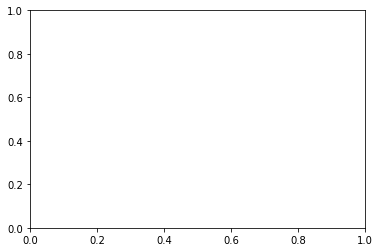

In [10]:
m = pn.interact(plot_infoshift,gene=select_gene,growth=select_growth)

m3 = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=0)

m3 = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=select_TF)

In [11]:
#for i in range(len(TF_lengths)):
#    outpanel = m
#    outpanel.add()

figs_column = pn.Column(m[1])
for i in range(len(TF_lengths)):
    temp = pn.interact(plot_TFs,gene=select_gene,growth=select_growth,location=i)
    figs_column.append(temp)
    

mout = pn.Row(pn.Column(m[0]), figs_column)


In [12]:
mout = pn.Row(pn.Column(m[0]), pn.Column(m[1])).servable()


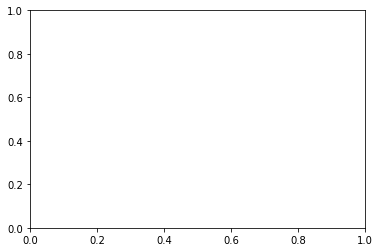

In [18]:
#mout.save('test.html')

In [13]:
mout

Row
    [0] Column
        [0] Column
            [0] Select(options=['holC', 'dicA', ...], value='holC')
            [1] Select(options=['heat', 'LB', ...], value='heat')
    [1] Column
        [0] Row
            [0] Matplotlib(Figure, name='interactive00006')

In [19]:
q = mout.get_root()


In [20]:
q.

Row(id='1113', ...)

now lets add in logos